# The Sewer System

**Our team aims to find the best area where Pennywise from IT would be able to succeed in luring the most children. 
This notebook will help us evaluate the amount of sewer systems in Pittsburgh, knowing these areas would help us find out which neighborhood has a well connected system where there are children nearby to see if Pennywise would more than likely be in that location.**

In [29]:
# Loading Pandas 
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Here are the 10 entries that we get from the data set:**

In [4]:
tsv_file = "Basin.tsv"
df = pd.read_csv(tsv_file, sep="\t")
df.head(10)
                   

,_id,fid,perimeter,poly,subclass,subclass_,basin,symbol,direction,shape_length,shape_area
0,1090,1,161330.9100,1,BASIN,5,Lower Ohio River,17,north,0.513314,0.006315
1,1091,2,113386.4000,2,BASIN,1,Upper Ohio/Allegheny/Monongahela Ri,12,north,0.368109,0.003316
2,1092,3,147009.8000,3,BASIN,2,Lower Northern Allegheny River,23,north,0.463225,0.003780
3,1093,4,103578.0000,4,BASIN,3,Upper Allegheny River,57,north,0.329912,0.004036
4,1094,5,53398.6990,5,BASIN,5,Lower Ohio River,17,north,0.184703,0.000365
5,1095,6,349470.8100,6,BASIN,4,Chartiers Creek,25,south,1.123562,0.026668
6,1096,7,92945.4690,7,BASIN,1,Upper Ohio/Allegheny/Monongahela Ri,12,north,0.293921,0.002346
7,1097,8,6792.2939,8,BASIN,5,Lower Ohio River,17,north,0.023594,0.000017
8,1098,9,130340.8000,9,BASIN,1,Upper Ohio/Allegheny/Monongahela Ri,12,east,0.418928,0.004624
9,1099,10,242297.9100,10,BASIN,7,Thompson Run/Turtle Creek,19,east,0.772217,0.016991


**Using this information we can now narrow down the areas in which it would be easier/faster for Pennywise to travel. The smaller sizes would be considered.**

In [30]:
import pandas as pd
basin_threshold = 0.368109
# basins with area greater than or equal to 0.368109 

df1['Size'] = 'Huge'
df1.loc[df1['shape_length'] >= basin_threshold, 'Size'] = 'Small'

# Sort 'shape_length' in from greatest to least
# filter out rows where 'fid' is higher than 10
filterd = df1.sort_values(by='shape_length', ascending=False).loc[(df1['fid'] <= 10) ]
print(filterd[['basin', 'shape_length', 'Size']])



                                 basin  shape_length   Size
5                      Chartiers Creek      1.123562  Small
9            Thompson Run/Turtle Creek      0.772217  Small
0                     Lower Ohio River      0.513314  Small
2       Lower Northern Allegheny River      0.463225  Small
8  Upper Ohio/Allegheny/Monongahela Ri      0.418928  Small
1  Upper Ohio/Allegheny/Monongahela Ri      0.368109   Huge
3                Upper Allegheny River      0.329912   Huge
6  Upper Ohio/Allegheny/Monongahela Ri      0.293921   Huge
4                     Lower Ohio River      0.184703   Huge
7                     Lower Ohio River      0.023594   Huge


**Based on research the Chartiers Creek is the smallest length and Lower Ohio River would be the largest, this is going in descending order.**

**Now we'd use the information and research known to categorize what people would be doing in these ares and would it be a child friendly activity and if Pennyswise would want to be in this area:**

In [25]:
categories = {
'Thompson Run/Turtle Creek': 'Field trips',
    'Chartiers Creek': 'Fishing',
    'Upper Ohio/Allegheny/Monongahela Ri': 'Fishing',
    'Lower Ohio River' : 'Too far',  
    'Lower Northern Allegheny River': 'Too far'
}

# Create a new column 'Category' and assign categories based on basin names
df1['Category'] = df1['basin'].map(categories).fillna('Unknown')
basint = 0.368109  

# assign categories based on basin area
df1['Size'] = 'Huge'
df1.loc[df1['shape_length'] >= basint 'Size'] = 'Small'

# show only rows where 'Size' is 'Small'
filtered_df = df1[(df1['fid'] <= 10) & (df1['Size'] == 'Small')]

# Display the DataFrame with the new 'Category' and 'Size' columns
print(filtered_df[['basin', 'Category', 'Size']])




                                 basin     Category   Size
0                     Lower Ohio River      Too far  Small
2       Lower Northern Allegheny River      Too far  Small
5                      Chartiers Creek      fishing  Small
8  Upper Ohio/Allegheny/Monongahela Ri      fishing  Small
9            Thompson Run/Turtle Creek  field trips  Small


**Here's a graph showing the results:**

                                 basin     Category   Size
0                     Lower Ohio River      Too far  Small
2       Lower Northern Allegheny River      Too far  Small
5                      Chartiers Creek      fishing  Small
8  Upper Ohio/Allegheny/Monongahela Ri      fishing  Small
9            Thompson Run/Turtle Creek  field trips  Small


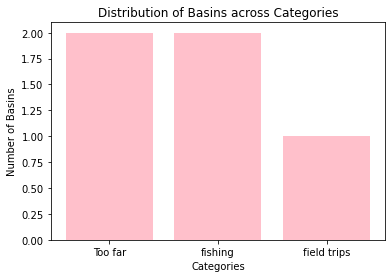

In [28]:
categories = {
    'Thompson Run/Turtle Creek': 'Field trips',
    'Chartiers Creek': 'Fishing',
    'Upper Ohio/Allegheny/Monongahela Ri': 'Fishing',
    'Lower Ohio River': 'Too far',
    'Lower Northern Allegheny River': 'Too far'
}

# Display the DataFrame with the new 'Category' and 'Size' columns
print(filtered_df[['basin', 'Category', 'Size']])

categoryc = filtered_df['Category'].value_counts()

plt.bar(categoryc.index, categoryc.values, color='pink')
plt.xlabel('Categories')
plt.ylabel('Number of Basins')
plt.title('Distribution of Basins across Categories')
plt.show()


**Thompson Run/Turtle Creek would be the best Basin for Pennywise to due to the location and being one of the smallest basins, which would allow Pennywise to snatch children.**